In [2]:
#Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv('train.csv')

# Sneak peek on the data

In [4]:
df_train.head()

#There are some categorical data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_train.info()

#there is missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory Data Analysis 

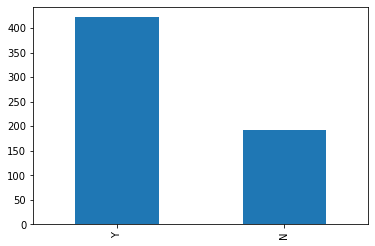

In [6]:
#lets see how many get the loan
df_train['Loan_Status'].value_counts().plot.bar()

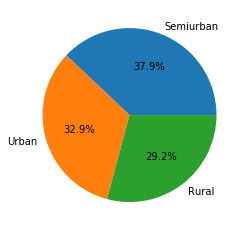

In [7]:
#percentage of applicant from certain property area

area = df_train['Property_Area'].value_counts()

plt.pie(area, labels = area.index,autopct='%1.1f%%')

plt.show()

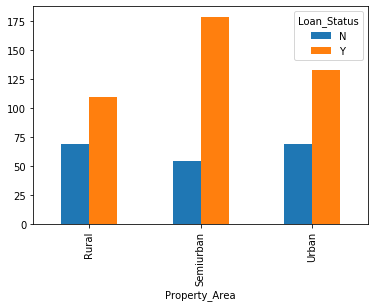

In [8]:
#loan status according to the property area

cb = pd.crosstab(df_train['Property_Area'],df_train['Loan_Status'])

cb.plot.bar(stacked=False)

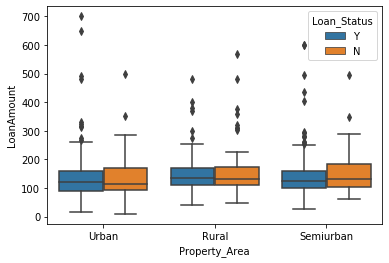

In [9]:
#loan-amount from certain property area, with laon status
 
sns.boxplot(x="Property_Area", y="LoanAmount",hue='Loan_Status',data=df_train)

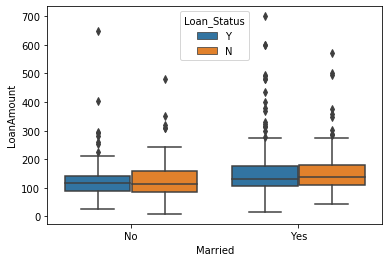

In [10]:
#loan-amount from the person who are married or not, with laon status

sns.boxplot(x="Married", y="LoanAmount",hue='Loan_Status',data=df_train)

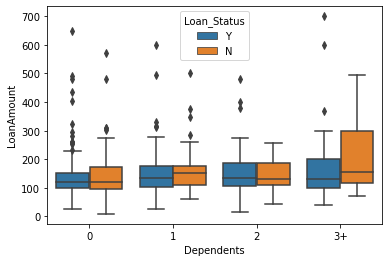

In [11]:
#loan-amount by the person who have number of dependents, with laon status

sns.boxplot(x="Dependents", y="LoanAmount",hue='Loan_Status',data=df_train)

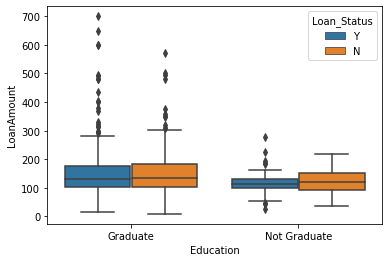

In [12]:
#loan-amount by the person who is educated or not, with laon status


sns.boxplot(x="Education", y="LoanAmount",hue='Loan_Status',data=df_train)

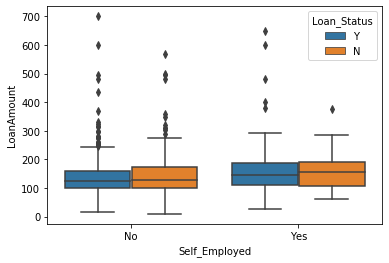

In [13]:
#loan-amount by the person who is self-employed or not, with laon status


sns.boxplot(x="Self_Employed", y="LoanAmount",hue='Loan_Status',data=df_train)

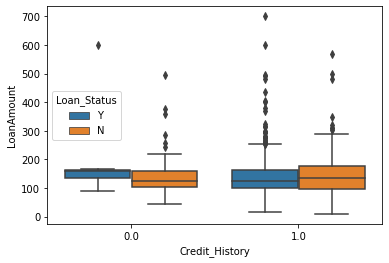

In [14]:
#loan-amount by the person with its credit history, with laon status


sns.boxplot(x="Credit_History", y="LoanAmount",hue='Loan_Status',data=df_train)

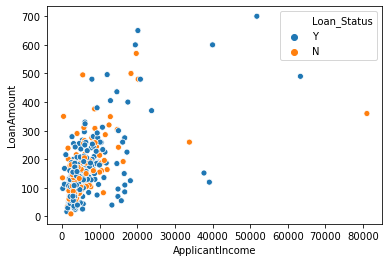

In [15]:
#loan-amount by the person with its own income amount, with laon status


sns.scatterplot(x="ApplicantIncome", y="LoanAmount",hue='Loan_Status',data=df_train)

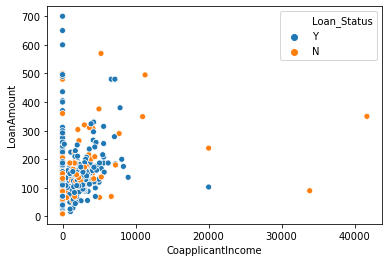

In [16]:
#loan-amount by the person with Co-applicant income amount, with laon status

sns.scatterplot(x="CoapplicantIncome", y="LoanAmount",hue='Loan_Status',data=df_train)

In [17]:
#Now we will split the categorical columns and numerical columns

In [18]:
#data for categorical data

train_cat = df_train.copy()

In [19]:
train_cat = train_cat.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [20]:
#checking if there any null value

train_cat.isnull().sum().sort_values(ascending=False)

Credit_History    50
Self_Employed     32
Dependents        15
Gender            13
Married            3
Loan_Status        0
Property_Area      0
Education          0
dtype: int64

In [21]:
#fill every missing value with their next value in the same column

train_cat.fillna(method='ffill', inplace=True)

In [22]:
#there is no null value

train_cat.isnull().sum().any()

False

In [23]:
#data for numerical columns

train_num = df_train.copy()

In [24]:
train_num = train_num.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status'],axis=1)

In [25]:
train_num.isnull().sum().sort_values(ascending=False)

LoanAmount           22
Loan_Amount_Term     14
CoapplicantIncome     0
ApplicantIncome       0
dtype: int64

In [26]:
#fill every missing value with its previous value in the same column


train_num.fillna(method='bfill', inplace=True)

In [27]:
train_num.isnull().sum().any()

False

In [28]:
#now concat both the columns

train_con = pd.concat([train_cat,train_num],axis=1)

# Train the data

In [29]:

X = train_con.drop('Loan_Status', axis=1)
y = train_con.Loan_Status

In [44]:
#get_dummies() function convert categorical variable into dummy variables.

X = pd.get_dummies(X)

In [45]:
X.head()

,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,5849,0.0,128.0,360.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.0,360.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,1.0,3000,0.0,66.0,360.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,1.0,2583,2358.0,120.0,360.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,1.0,6000,0.0,141.0,360.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [40]:
#splitting data into test and train

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [41]:
#using decision tree model

algo = DecisionTreeClassifier()
algo.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
predict_test = algo.predict(X_test)

In [43]:
accuracy_score(y_test,predict_test)

0.745945945945946